In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.signal import correlate
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib as mpl
import networkx as nx

# SEABORN PRISM

In [34]:
def set_prism_style():
    """
    Configure Seaborn and Matplotlib to closely resemble GraphPad Prism's style.
    """
    # Use Seaborn's whitegrid style as the base
    sns.set_theme(
        style="ticks", # white, dark, whitegrid, darkgrid, ticks
        rc={
            'axes.edgecolor': 'black',               # Color of the axes border
            'axes.facecolor': 'white',               # Background color of the axes
            'axes.grid': False,                      # Enable grid
            
            'axes.labelcolor': 'black',              # Color of axis labels
            'axes.labelsize': 20,                    # Axes labels font size (slightly smaller)
            'axes.labelweight': 'normal',            # Regular weight for labels (not bold)
            'axes.linewidth': 1.5,                   # Thinner axes lines to match Prism style
            'axes.spines.right': False,              # No right border for the plot
            'axes.spines.top': False,                # No top border for the plot
            
            'axes.titlepad': 24,                     # Title padding (adjusted for more compact style)
            'axes.titlesize': 24,                    # Title font size slightly smaller than before
            'axes.unicode_minus': False,             # Handle minus sign

            
            'figure.facecolor': 'white',             # White background for figure
            'figure.figsize': (8, 6),                # Standard size for Prism graphs
            
            'font.family': 'sans-serif',             # Sans-serif fonts like Prism
            'font.sans-serif': 'Arial',              # Arial font family
            'font.weight': 'normal',                   # Regular font weight
            'font.size': 26,                         # Standard font size
            
            'grid.color': 'lightgray',               # Lighter grid color
            'grid.linestyle': '--',                  # Dashed grid lines (Prism style)
            'grid.linewidth': 0.5,                   # Slightly thinner grid lines
            
            'legend.borderpad': 0.5,                 # Space between legend and contents
            'legend.fontsize': 10,                   # Smaller legend font size
            'legend.frameon': False,                 # No frame for legend
            'legend.handlelength': 1.5,              # Length of the legend marker
            'legend.loc': 'best',                    # Best position for the legend
            
            'lines.color': 'tab:blue',               # Soft blue color (adjust as needed)
            'lines.linewidth': 2,                    # Medium-thick lines
            'lines.marker': '',                      # No markers, only lines
            
            'savefig.dpi': 300,                      # High resolution for saved figures
            'savefig.transparent': False,            # Save with white background
            
            'text.usetex': True,                     # No LaTeX for text
            
            'xtick.direction': 'in',                # X-axis ticks pointing inward
            'xtick.labelsize': 16,                  # Font size for x-axis tick labels
            'xtick.major.pad': 5,                   # Padding between x-axis ticks and labels
            'xtick.major.size': 4,                 # Major x-axis tick size
            'xtick.major.width': 0.8,               # Major x-axis tick width
            'xtick.minor.visible': False,            # Show minor ticks on the x-axis
            'xtick.minor.size': 5,                  # Minor x-axis tick size
            'xtick.minor.width': 0.5,               # Minor x-axis tick width
            'xtick.color': 'black',                 # X-axis tick color
            
            'ytick.direction': 'in',                # Y-axis ticks pointing inward
            'ytick.labelsize': 16,                  # Font size for y-axis tick labels
            'ytick.major.pad': 5,                   # Padding between y-axis ticks and labels
            'ytick.major.size': 4,                 # Major y-axis tick size
            'ytick.major.width': 0.8,               # Major y-axis tick width
            'ytick.minor.visible': False,            # Show minor ticks on the y-axis
            'ytick.minor.size': 5,                  # Minor y-axis tick size
            'ytick.minor.width': 0.5,               # Minor y-axis tick width
            'ytick.color': 'black',                 # Y-axis tick color
        },
    )
    # Use a specific color palette closer to Prism's aesthetic
    prism_colors = {
    "Blue": "#AEC6CF",
    "Green": "#77DD77",
    "Yellow": "#FDFD96",
    "Orange": "#FFB347",
    "Pink": "#FFB6C1",
    "Purple": "#CBAACB",
    "Red": "#FF6961",
    "Teal": "#B2DFDB",
    "Lilac": "#D4A4F4",
    "Mint": "#AAF0D1",
    "Peach": "#FFDAB9",
    "Grey": "#D3D3D3",
    "Lime": "#BFFF00",
    "Cyan": "#AEEEEE",
    "Coral": "#FF9AA2",
    "Sky Blue": "#87CEEB",
    "Lavender": "#E6E6FA",
    "Apricot": "#FDD5B1",
    "Rose": "#FFC0CB",
    "Turquoise": "#40E0D0",
    "Butter": "#FFFACD",
    "Periwinkle": "#CCCCFF",
    "Sand": "#F4A460",
    "Seafoam": "#9FE2BF",
    "Chartreuse": "#DFFF00",
    "Salmon": "#FFA07A",
    "Beige": "#F5F5DC",
    "Ivory": "#FFFFF0",
    "Mauve": "#E0B0FF",
    "Vanilla": "#F3E5AB",
    "Cream": "#FFFDD0",
    "Blush": "#DE5D83",
    "Khaki": "#F0E68C",
    "Light Blue": "#ADD8E6",
    "Soft Violet": "#CBC3E3",
    "Pale Aqua": "#BCD4E6",
    "Light Salmon": "#FFA07A",
    }
    sns.set_palette(list(prism_colors.values()))

    # Fine-tune font and resolution for professional output
    plt.rcParams.update({
        "text.usetex": True,                  # Enable LaTeX for rendering
        "font.family": "sans-serif",          # Use a clean sans-serif font
        "font.sans-serif": ["Arial"],         # Arial matches Prism's default
        "figure.dpi": 120,                    # Higher DPI for clarity
        "savefig.dpi": 300,                   # Save images with high resolution
        "savefig.transparent": True,          # Transparent background
        "axes.autolimit_mode": "round_numbers", # Rounded limits for clean axes
    })


# Spine offset
# ax.spines['bottom'].set_position(('outward', 10))  # Move x-axis spine outward by 10 points
# ax.spines['left'].set_position(('outward', 10))    # Move y-axis spine outward by 10 points


set_prism_style()

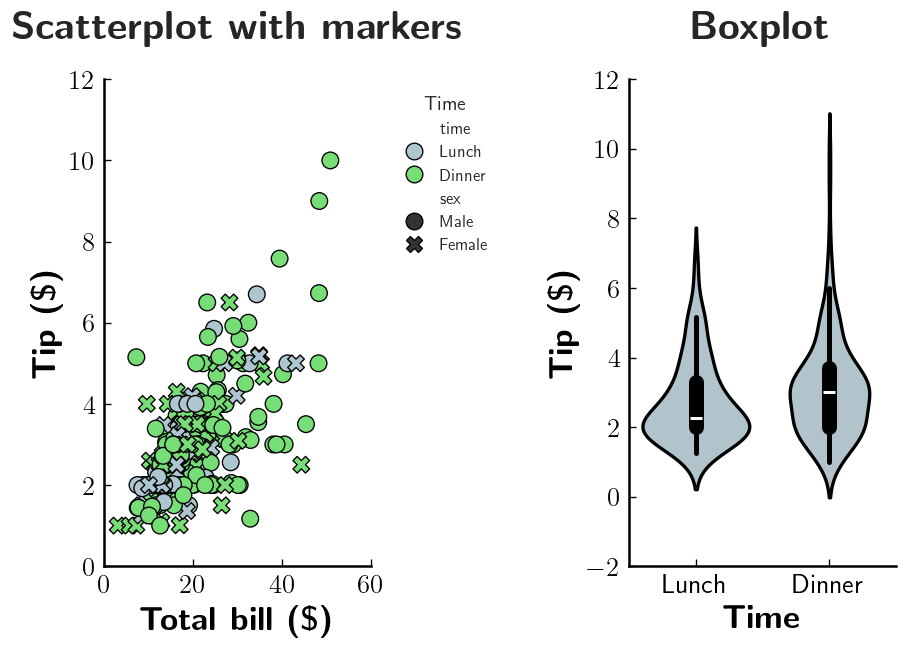

In [39]:
# Load dataset
tips = sns.load_dataset("tips")

fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Scatterplot with markers and LaTeX labels
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    style="sex",
    s=100,                  # Larger marker size for clarity
    edgecolor="black",      # Black edges for better definition
    linewidth=0.8,           # Thin marker edges
    ax=ax[0]
)

# Boxplot with Seaborn
sns.violinplot(
    data=tips,
    x="time",
    y="tip",
    ax=ax[1],
    linewidth=2,
    linecolor="black",
    )

# Titles and labels with LaTeX
ax[0].set_title(r"\textbf{Scatterplot with markers}")
ax[0].set_xlabel(r"\textbf{Total bill (\$)}")
ax[0].set_ylabel(r"\textbf{Tip (\$)}")

ax[1].set_title(r"\textbf{Boxplot}")
ax[1].set_xlabel(r"\textbf{Time}")
ax[1].set_ylabel(r"\textbf{Tip (\$)}")


# Legend outside the plot
ax[0].legend(title="Time", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show
plt.tight_layout()

# MATPLOTLIB PRISM

In [ ]:
# Reset to default
plt.rcdefaults()

# Further refined rcParams for closer Prism-like appearance
rc_params = {
    'axes.edgecolor': 'black',               # Color of the axes border
    'axes.facecolor': 'white',               # Background color of the axes
    'axes.grid': False,                      # Enable grid
    'axes.labelcolor': 'black',              # Color of axis labels
    'axes.labelsize': 20,                    # Axes labels font size (slightly smaller)
    'axes.labelweight': 'normal',            # Regular weight for labels (not bold)
    'axes.linewidth': 0.8,                   # Thinner axes lines to match Prism style
    'axes.spines.right': False,              # No right border for the plot
    'axes.spines.top': False,                # No top border for the plot
    'axes.titlepad': 24,                     # Title padding (adjusted for more compact style)
    'axes.titlesize': 24,                    # Title font size slightly smaller than before
    'axes.unicode_minus': False,             # Handle minus sign
    'figure.facecolor': 'white',             # White background for figure
    'figure.figsize': (8, 6),                # Standard size for Prism graphs
    'font.family': 'sans-serif',             # Sans-serif fonts like Prism
    'font.sans-serif': 'Arial',              # Arial font family
    'font.weight': 'bold',                   # Regular font weight
    'font.size': 26,                         # Standard font size
    'grid.color': 'lightgray',               # Lighter grid color
    'grid.linestyle': '--',                  # Dashed grid lines (Prism style)
    'grid.linewidth': 0.5,                   # Slightly thinner grid lines
    'legend.borderpad': 0.5,                 # Space between legend and contents
    'legend.fontsize': 10,                   # Smaller legend font size
    'legend.frameon': False,                 # No frame for legend
    'legend.handlelength': 1.5,              # Length of the legend marker
    'legend.loc': 'best',                    # Best position for the legend
    'lines.color': 'tab:blue',               # Soft blue color (adjust as needed)
    'lines.linewidth': 2,                    # Medium-thick lines
    'lines.marker': '',                      # No markers, only lines
    'savefig.dpi': 300,                      # High resolution for saved figures
    'savefig.transparent': False,            # Save with white background
    'text.usetex': True,                     # No LaTeX for text
    'xtick.direction': 'in',                 # X-axis ticks pointing inward
    'xtick.labelsize': 16,                   # Smaller font size for ticks
    'xtick.major.pad': 5,                    # Adjust spacing between ticks and labels
    'xtick.major.size': 4,                   # Smaller ticks for a cleaner look
    'xtick.major.width': 0.8,                # Thinner tick marks
    'xtick.minor.visible': False,            # Hide minor ticks
    'ytick.direction': 'in',                 # Y-axis ticks pointing inward
    'ytick.labelsize': 16,                   # Smaller font size for ticks
    'ytick.major.pad': 5,                    # Adjust spacing between ticks and labels
    'ytick.major.size': 4,                   # Smaller ticks for a cleaner look
    'ytick.major.width': 0.8,                # Thinner tick marks
    'ytick.minor.visible': False,            # Hide minor ticks
}
plt.rcParams.update(rc_params)


# Define colors and their positions within the [0, 1] range
colors = [
    (0.0, 'white'),   # Start at white
    (0.5, 'green'),   # Transition to green at 0.5
    (0.9, 'red'),     # Transition to red at 0.9
    (1.0, 'blue'),    # Transition to blue at 0.9
]


# Create the colormap with 1000 segments for smooth gradients
cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=1000)


prism_colors = {
    "blue": "#0072B2",
    "blu": "#0072B2",
    "orange": "#E69F00",
    "ora": "#E69F00",
    "green": "#009E73",
    "grn": "#009E73",
    "red": "#D55E00",
    "red": "#D55E00",
    "purple": "#CC79A7",
    "prp": "#CC79A7",
    "pink": "#F0E442",
    "pnk": "#F0E442",
    "brown": "#A6761D",
    "brn": "#A6761D",
    "light_blue": "#56B4E9",
    "lt_blu": "#56B4E9",
    "dark_blue": "#00274C",
    "dk_blu": "#00274C",
    "dark_orange": "#A55F0D",
    "dk_ora": "#A55F0D",
    "dark_green": "#007C42",
    "dk_grn": "#007C42",
    "dark_red": "#8B1E00",
    "dk_red": "#8B1E00",
    "dark_purple": "#781D70",
    "dk_prp": "#781D70",
    "dark_pink": "#E2C027",
    "dk_pnk": "#E2C027",
    "gray": "#7F7F7F",
    "gry": "#7F7F7F",
    "light_gray": "#D3D3D3",
    "lt_gry": "#D3D3D3"
}


# # Move the bottom spine downwards and left spine to the left
# ax.spines['bottom'].set_position(('outward', 15))  # Move x-axis down by 10 points
# ax.spines['left'].set_position(('outward', 15))    # Move y-axis left by 10 points


# MY-MATPLOTLIB

In [ ]:
# Setting rc params for all plots

plt.rcdefaults()

rc_params = {
    'axes.titlesize': 20,
    'axes.labelsize': 15,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'lines.linewidth': 1,
    'axes.grid': False,
    'figure.titlesize': 30,
    'axes.prop_cycle': plt.cycler(color=plt.cm.Dark2.colors),
}

plt.rcParams.update(rc_params)

colors = ['silver', 'skyblue', 'royalblue', 'blue', 'navy']
color_positions = [0.0, 0.25, 0.5, 0.75, 1] # range of each color
cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', list(zip(color_positions, colors)), N=1000)
#cmap = 'inferno'
